# Data Preprocessing

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2, glob, os, pickle
from src.preprocessing import *

Import labels

In [2]:
labels_df = pd.read_csv('data/raw/train.csv', dtype={'Id': 'str'})
print(labels_df.head())
print(labels_df.shape)

           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
(25361, 2)


Number and distribution of classes

No of classes: 5005


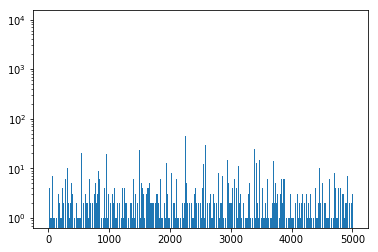

In [3]:
classes_unique = list(set(labels_df['Id']))
print('No of classes:', len(classes_unique))
class_count_list = [labels_df[labels_df['Id'] == class_id].shape[0]\
                    for class_id in classes_unique]
plt.figure()
plt.bar(list(range(len(classes_unique))), class_count_list)
plt.xlabel('')
plt.yscale('log')
plt.show()

Import one train image

Image shape: (700, 1050, 3)


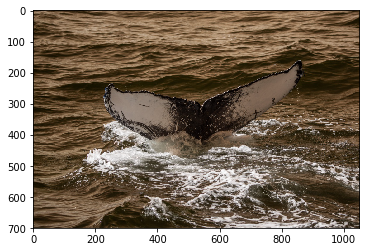

In [4]:
image = cv2.imread('data/raw/train/0000e88ab.jpg')
print('Image shape:', image.shape)
plt.imshow(image)

Resize image

Resized image shape: (128, 128, 3)


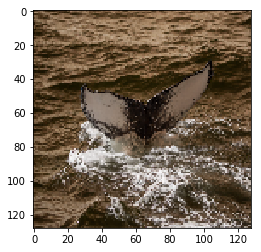

In [5]:
resize_width = 128
image_resized = cv2.resize(image, (resize_width, resize_width))
plt.imshow(image_resized)
print('Resized image shape:', image_resized.shape)

Import training set images and convert to NumPy arrays

In [3]:
train_file_list_original = glob.glob('data/raw/train/*.jpg')
train_file_list_short = [train_file.replace('data/raw/train/', '')\
                         for train_file in train_file_list_original]
print(train_file_list_short[:5])

['34f0601f3.jpg', '56c7f5e08.jpg', 'e4e681dcf.jpg', '624900e7d.jpg', 'bad682500.jpg']


In [6]:
resize_width = 128
if os.path.exists('data/derived/data_train.pickle'):
    print('Path {} exists'.format('data/derived/data_train.pickle'))
else:
    data_train_list = [image_load_resize(train_file, resize_width)\
                       for train_file in train_file_list_original]
    data_train = np.stack(data_train_list)
    with open('data/derived/data_train.pickle', 'wb') as file:
        pickle.dump(data_train, file)
if os.path.exists('data/derived/labels_train.pickle'):
    print('Path {} exists'.format('data/derived/labels_train.pickle'))
else:
    labels_train = [labels_df[labels_df['Image'] == train_file_short]['Id'].to_string(header=False, index=False)\
                   for train_file_short in train_file_list_short]
    with open('data/derived/labels_train.pickle', 'wb') as file:
        pickle.dump(labels_train, file)
with open('data/derived/data_train.pickle', 'rb') as file:
    data_train = pickle.load(file)
with open('data/derived/labels_train.pickle', 'rb') as file:
    labels_train = pickle.load(file)

print('data_train:', data_train[:1])
print('Training data shape:', data_train.shape)
print('labels_train:', labels_train[:5])
print('Training labels length:', len(labels_train))

Path data/derived/data_train.pickle exists
Path data/derived/labels_train.pickle exists
data_train: [[[[170 159 155]
   [144 138 133]
   [163 156 153]
   ...
   [173 165 165]
   [142 137 138]
   [168 160 160]]

  [[141 132 129]
   [136 130 125]
   [152 147 144]
   ...
   [156 148 148]
   [153 145 143]
   [144 137 136]]

  [[150 143 143]
   [167 159 159]
   [163 158 155]
   ...
   [165 160 158]
   [163 155 148]
   [148 144 139]]

  ...

  [[151 144 141]
   [155 144 145]
   [160 147 148]
   ...
   [121 112 108]
   [140 136 133]
   [174 162 168]]

  [[149 142 140]
   [152 149 144]
   [160 156 151]
   ...
   [141 132 128]
   [ 99  97  89]
   [ 97  98  92]]

  [[149 143 140]
   [141 134 129]
   [148 143 134]
   ...
   [163 155 156]
   [142 137 138]
   [149 139 140]]]]
Training data shape: (25361, 128, 128, 3)
labels_train: ['w_274d994', 'new_whale', 'w_799b208', 'w_a8b34a0', 'w_cda3971']
Training labels length: 25361


In [8]:
test_file_list_original = glob.glob('data/raw/test/*.jpg')
test_file_list_short = [test_file.replace('data/raw/test/', '')\
                         for test_file in test_file_list_original]
print(test_file_list_short[:5])

['9fcdd6f1a.jpg', '702c9eb7e.jpg', '2cd1593b0.jpg', 'af697a5e9.jpg', '465b5b1ab.jpg']


In [9]:
resize_width = 128
if os.path.exists('data/derived/data_test.pickle'):
    print('Path {} exists'.format('data/derived/data_test.pickle'))
else:
    data_test_list = [image_load_resize(test_file, resize_width)\
                       for test_file in test_file_list_original]
    data_test = np.stack(data_test_list)
    with open('data/derived/data_test.pickle', 'wb') as file:
        pickle.dump(data_test, file)
with open('data/derived/data_test.pickle', 'rb') as file:
    data_test = pickle.load(file)
print('data_test:', data_test[:2])
print('Test data shape:', data_test.shape)

data_test: [[[[255 254 254]
   [255 254 253]
   [254 252 248]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[252 254 253]
   [254 252 251]
   [253 248 243]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[252 246 244]
   [243 234 227]
   [242 235 228]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[247 240 240]
   [250 242 242]
   [251 243 243]
   ...
   [243 235 235]
   [241 228 225]
   [245 240 239]]

  [[254 252 252]
   [248 244 243]
   [245 237 237]
   ...
   [242 236 233]
   [237 228 224]
   [243 239 238]]

  [[253 253 253]
   [255 255 255]
   [255 255 255]
   ...
   [242 238 233]
   [253 251 248]
   [247 245 244]]]


 [[[213 153 111]
   [210 151 107]
   [210 151 105]
   ...
   [208 144  96]
   [206 148  99]
   [214 155 110]]

  [[209 149 104]
   [208 150 104]
   [211 151 106]
   ...
   [207 148 102]
   [211 153 108]
   [211 154 109]]

  [[212 153 107]
   [211 154 109]
   [208 156 117]
   ...
   [214 154 117]
   [212 154 118]


In [53]:
type(labels_df[labels_df['Image'] == '34f0601f3.jpg']['Id'].to_string(header=False, index=False))

str